<a href="https://colab.research.google.com/github/tpenanen/Laptop-Price-Project/blob/main/Clustering_(With_Pipeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

data = pd.read_csv('laptop_price.csv', encoding = 'latin1')
data.head()

data['target'] = (data['Price_usd']).astype(int)
del data['Price_usd']

categorical_columns = data.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

data_features = data.drop(["target", "Price_euros"], axis=1)

print(data["Company"].unique())
name = data["Company"]
Company_names = []
Acer_count = Apple_count=Asus_count=Chuwi_count = Dell_count = Fujitsu_count= Google_count = HP_count = Huawei_count = Lenovo_count = LG_count = Media_count = Microsoft_count=0
Msi_count = razer_count = samsung_count = toshi_count = vero_count = Xiaomi_count = 0
for c in name:
  c = c.strip()
  if c == "Acer":
    Acer_count+=1
    Company_names.append("Acer")
  if c == "Apple":
    Apple_count+=1
    Company_names.append("Apple")
  if c == "Asus":
    Asus_count+=1
    Company_names.append("Asus")
  if c == "Chuwi":
    Chuwi_count+=1
    Company_names.append("Chuwi")
  if c == "Dell":
    Dell_count+=1
    Company_names.append("Dell")
  if c == "Fujitsu":
    Fujitsu_count+=1
    Company_names.append("Fujitsu")
  if c == "Google":
    Google_count+=1
    Company_names.append("Google")
  if c == "HP":
    HP_count+=1
    Company_names.append("HP")
  if c == "Huawei":
    Huawei_count+=1
    Company_names.append("Huawei")
  if c == "Lenovo":
    Lenovo_count+=1
    Company_names.append("Lenovo")
  if c == "LG":
    LG_count+=1
    Company_names.append("LG")
  if c == "Mediacom":
    Media_count+=1
    Company_names.append("Mediacom")
  if c == "Microsoft":
    Microsoft_count+=1
    Company_names.append("Microsoft")
  if c == "MSI":
    Msi_count+=1
    Company_names.append("MSI")
  if c == "Razer":
    Company_names.append("Razer")
    razer_count+=1
  if c == "Samsung":
    Company_names.append("Samsung")
    samsung_count+=1
  if c == "Toshiba":
    Company_names.append("Toshiba")
    toshi_count+=1
  if c == "Vero":
    Company_names.append("Vero")
    vero_count+=1
  if c == "Xiaomi":
    Company_names.append("Xiaomi")
    Xiaomi_count+=1

print(Acer_count,Asus_count,Apple_count,Chuwi_count,Dell_count,HP_count,Huawei_count,Lenovo_count,LG_count,Media_count,Microsoft_count,Msi_count,razer_count,samsung_count,toshi_count,vero_count,Xiaomi_count)

data["Company_converted"] = Company_names
print(data[["Company","Company_converted"]].head())

le = LabelEncoder()
data['Company_Label'] = le.fit_transform(data['Company_converted'])
print(data[['Company_converted', 'Company_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

a = data['Gpu']
intel_count = 0
Nvidia_count = 0
Amd_count = 0
Gpu_brands = []
for i in a:
  m = i.split(" ")
  if m[0] == "Intel":
    intel_count +=1
    Gpu_brands.append("Intel")
  if m[0] == "Nvidia":
    Nvidia_count += 1
    Gpu_brands.append("Nvidia")
  if m[0] == "AMD":
    Amd_count +=1
    Gpu_brands.append("AMD")
  if m[0] == "ARM":
    Gpu_brands.append("ARM")
print(intel_count)
print(Nvidia_count)
print(Amd_count)
print(intel_count+Amd_count+Nvidia_count)
data["Gpu_Brands"] = Gpu_brands
print(data[["Gpu","Gpu_Brands"]].head())

le = LabelEncoder()
data['Gpu_Brands_Label'] = le.fit_transform(data['Gpu_Brands'])
print(data[['Gpu_Brands', 'Gpu_Brands_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

from sklearn.preprocessing import LabelEncoder
CPU = data["Cpu"]
Cpu_brands = []
for m in CPU:
  Cpu_split= m.split(" ")
  if Cpu_split[0] == "Intel":
    if Cpu_split[1] == "Core":
      if Cpu_split[2] == "i3":
        Cpu_brands.append("Core i3")
      if Cpu_split[2] == "i5":
        Cpu_brands.append("Core i5")
      if Cpu_split[2] == "i7":
        Cpu_brands.append("Core i7")
      if Cpu_split[2] == "M":
        Cpu_brands.append("Core M")
    if Cpu_split[1] == "Xeon":
      Cpu_brands.append("Xeon")
    if Cpu_split[1] == "Pentium":
      Cpu_brands.append("Pentium")
    if Cpu_split[1] == "Celeron":
      Cpu_brands.append("Celeron")
    if Cpu_split[1] == "Atom":
      Cpu_brands.append("Atom")

  if Cpu_split[0] == "AMD":
    Cpu_brands.append("AMD")

  if Cpu_split[0] == "Samsung":
    Cpu_brands.append("Samsung")



data["Cpu_Brands"] = Cpu_brands
print(data[["Cpu","Cpu_Brands"]].head())

le = LabelEncoder()
data['Cpu_Brands_Label'] = le.fit_transform(data['Cpu_Brands'])
print(data[['Cpu_Brands', 'Cpu_Brands_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Type = data["TypeName"]
note_count = 0
ultra_count = 0
conv_count = 0
gaming_count = 0
net_count = 0
work_count = 0
print(data["TypeName"].unique())
Type_names = []
for t in Type:
  if t == "Notebook":
    note_count +=1
    Type_names.append("Notebook")
  if t == "Ultrabook":
    ultra_count += 1
    Type_names.append("Ultrabook")
  if t == "2 in 1 Convertible":
    conv_count += 1
    Type_names.append("Convertible")
  if t == "Gaming":
    Type_names.append("Gaming")
    gaming_count += 1
  if t == "Netbook":
    net_count += 1
    Type_names.append("Netbook")
  if t == "Workstation":
    Type_names.append("Workstation")
    work_count += 1
print(note_count)
print(ultra_count)
print(conv_count)
print(gaming_count)
print(net_count)
print(work_count)

data["TypeName_converted"] = Type_names
print(data[["TypeName","TypeName_converted"]].head())

le = LabelEncoder()
data['TypeName_Label'] = le.fit_transform(data['TypeName_converted'])
print(data[['TypeName_converted', 'TypeName_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

print(data["Ram"].unique())
ram = data["Ram"]
ram_types = []
count_2=count_4=count_6=count_8=count_12=count_16=count_24=count_32=count_64=0
for r in ram:
  if r == "2GB":
    ram_types.append("2")
    count_2+=1
  if r == "4GB":
    count_4+=1
    ram_types.append("4")
  if r == "6GB":
    count_6 +=1
    ram_types.append("6")
  if r == "8GB":
    count_8+=1
    ram_types.append("8")
  if r == "12GB":
    count_12+=1
    ram_types.append("12")
  if r == "16GB":
    count_16+=1
    ram_types.append("16")
  if r == "24GB":
    count_24+=1
    ram_types.append("24")
  if r == "32GB":
    count_32+=1
    ram_types.append("32")
  if r == "64GB":
    count_64+=1
    ram_types.append("64")

print(count_2,count_4,count_6,count_8,count_12,count_16,count_24,count_32,count_64)
data["Ram_types"] = ram_types
print(data[["Ram","Ram_types"]].head())

OP = data["OpSys"]
op_systems = []
for o in OP:
  if o == "Windows 10":
    op_systems.append("Windows 10")
  if o == "Windows 10 S":
    op_systems.append("Windows 10")
  if o == "Windows 7":
    op_systems.append("Windows 7")
  if o == "Linux":
    op_systems.append("Linux")
  if o == "Mac OS X":
    op_systems.append("Mac OS")
  if o == "macOS":
    op_systems.append("Mac OS")
  if o == "No OS":
    op_systems.append("No OS")
  if o == "Chrome OS":
    op_systems.append("Chrome OS")
  if o == "Android":
    op_systems.append("Android")
data["Operating_system"] = op_systems
print(data[["OpSys","Operating_system"]].head())

le = LabelEncoder()
data['OperatingSys_label'] = le.fit_transform(data['Operating_system'])
print(data[['OperatingSys_label', 'Operating_system']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

def memory_to_gb(mem_string):
    mem_string = mem_string.upper().replace(' ', '')
    parts = mem_string.split('+')
    total_gb = 0
    for part in parts:
        if 'TB' in part:
            num = part.split('TB')[0]
            try:
                total_gb += float(num) * 1000
            except:
                continue
        elif 'GB' in part:
            num = part.split('GB')[0]
            try:
                total_gb += float(num)
            except:
                continue
    return total_gb
data['Memory_GB'] = data['Memory'].apply(memory_to_gb)
print(data[['Memory', 'Memory_GB']].head())

data["Weight"] = data["Weight"].str.replace("kg", "")

['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']
['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'Lenovo' 'LG' 'Mediacom' 'Microsoft' 'MSI' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']
103 158 21 3 297 274 2 297 3 7 6 54 7 9 48 4 4
  Company Company_converted
0    Acer              Acer
1    Acer              Acer
2    Acer              Acer
3    Acer              Acer
4    Acer              Acer
  Company_converted  Company_Label
0              Acer              0
1              Acer              0
2              Acer              0
3              Acer              0
4              Acer              0
Label mapping: {'Acer': np.int64(0), 'Apple': np.int64(1), 'Asus': np.int64(2), 'Chuwi': np.int64(3), 'Dell': np.int64(4), 'Fujitsu': np.int64(5), 'Google': np.int64(6), 'HP': np.int64(7), 'Huawei': np.int64(8), 'LG': np.int64(9), 'Lenovo': np.int64(10), 'MSI': np.int64(11), 'Mediacom': np.int64(12), 'Micros

In [ ]:
data = data.drop(['Company',
                  'Product',
                  'TypeName',
                  'ScreenResolution',
                  'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
                  'Company_converted', 'TypeName_converted',
                  'Cpu_Brands', 'Gpu_Brands', 'Operating_system'], axis=1)

data.head()

data.describe()



,laptop_ID,Inches,Price_euros,target,Company_Label,Gpu_Brands_Label,Cpu_Brands_Label,TypeName_Label,OperatingSys_label,Memory_GB
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992,1226.430545,6.442824,2.029931,4.851113,2.582502,4.718342,610.904068
std,381.172104,1.426304,699.009043,763.258794,4.084128,0.927409,1.628546,1.245231,0.932281,467.509021
min,1.000000,10.100000,174.000000,189.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,331.500000,14.000000,599.000000,654.000000,4.000000,2.000000,5.000000,1.500000,5.000000,256.000000
50%,659.000000,15.600000,977.000000,1066.000000,7.000000,2.000000,5.000000,3.000000,5.000000,500.000000
75%,990.500000,15.600000,1487.880000,1624.000000,10.000000,3.000000,6.000000,3.000000,5.000000,1000.000000
max,1320.000000,18.400000,6099.000000,6659.000000,18.000000,3.000000,9.000000,5.000000,6.000000,2512.000000


In [ ]:
# Clustering before pre-processing (but with label-encoding)starts here:

# Gets all the clusters
kmeans = KMeans(n_clusters = 11, random_state = 30)
y_kmeans = kmeans.fit_predict(data)
kmeans.cluster_centers_


# Calculates the MSE
weighted_mse = 0
y = data['Price_euros']
for cluster_index in range(kmeans.n_clusters):
  y_in_cluster = y[y_kmeans == cluster_index] # I made this line of code with the help of AI
  mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
  weighted_mse += (len(y_in_cluster) / len(y)) * mse
print(weighted_mse)

43401.79318629258


In [ ]:
# Clustering with z-score normalization starts here:

standard_scaler = StandardScaler()
data_standard_scaler = standard_scaler.fit_transform(data.drop('Price_euros',axis=1))
kmeans = KMeans(n_clusters = 11, random_state = 30)
y_kmeans = kmeans.fit_predict(data_standard_scaler)
kmeans.cluster_centers_

weighted_mse = 0
y = data['Price_euros']
for cluster_index in range(kmeans.n_clusters):
  y_in_cluster = y[y_kmeans == cluster_index]
  mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
  weighted_mse += (len(y_in_cluster) / len(y)) * mse
print(weighted_mse)

188616.41511521174


In [ ]:
# Clustering with min-max normalization starts here:

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_min_max_scaler = min_max_scaler.fit_transform(data.drop('Price_euros',axis=1))
kmeans = KMeans(n_clusters = 11, random_state = 30)
y_kmeans = kmeans.fit_predict(data_min_max_scaler)
kmeans.cluster_centers_

weighted_mse = 0
y = data['Price_euros']
for cluster_index in range(kmeans.n_clusters):
  y_in_cluster = y[y_kmeans == cluster_index]
  mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
  weighted_mse += (len(y_in_cluster) / len(y)) * mse
print(weighted_mse)

379222.4316104201


Now, using the model that performed the best, I'm going to analyze the dataset
using a range of n_clusters and see the price range.

In [ ]:
weighted_mse_total = []
for k in [2, 4, 8, 16, 32, 64, 128]:
  kmeans = KMeans(n_clusters = k, random_state = 30)
  y_kmeans = kmeans.fit_predict(data)
  kmeans.cluster_centers_
  weighted_mse = 0

  y = data['Price_euros']
  for cluster_index in range(kmeans.n_clusters):
    y_in_cluster = y[y_kmeans == cluster_index]

    # These 3 lines of code were made with the help of AI.
    print(f"Cluster {cluster_index}: Size={len(y_in_cluster)}, "
      f"Price range=€{y_in_cluster.min():.0f}-€{y_in_cluster.max():.0f}, "
      f"Mean=€{y_in_cluster.mean():.0f}")
    mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
    weighted_mse += (len(y_in_cluster) / len(y)) * mse
  weighted_mse_total.append(weighted_mse)

total_weighted_mse_value = sum(weighted_mse_total)

Cluster 0: Size=950, Price range=€174-€1429, Mean=€783
Cluster 1: Size=353, Price range=€1396-€6099, Mean=€2042
Cluster 0: Size=507, Price range=€174-€833, Mean=€522
Cluster 1: Size=455, Price range=€759-€1499, Mean=€1091
Cluster 2: Size=253, Price range=€1390-€2339, Mean=€1793
Cluster 3: Size=88, Price range=€2242-€6099, Mean=€2836
Cluster 0: Size=198, Price range=€174-€989, Mean=€583
Cluster 1: Size=197, Price range=€1409-€2297, Mean=€1823
Cluster 2: Size=232, Price range=€252-€1407, Mean=€801
Cluster 3: Size=10, Price range=€3499-€6099, Mean=€4345
Cluster 4: Size=92, Price range=€2099-€3299, Mean=€2581
Cluster 5: Size=178, Price range=€745-€1519, Mean=€1072
Cluster 6: Size=208, Price range=€192-€810, Mean=€475
Cluster 7: Size=188, Price range=€881-€1637, Mean=€1241
Cluster 0: Size=117, Price range=€174-€752, Mean=€468
Cluster 1: Size=106, Price range=€1629-€2251, Mean=€1913
Cluster 2: Size=69, Price range=€889-€1499, Mean=€1168
Cluster 3: Size=4, Price range=€4389-€6099, Mean=€5222


That has been completed.

In [ ]:
# In order to improve the model, I'm using a correlation matrix to find which
# features to use.

price_corr = data.corr()['Price_euros'].abs().sort_values(ascending=False)
# print(price_corr)

important_features = ['Price_euros', 'Ram_types',
                      'Cpu_Brands_Label', 'Gpu_Brands_Label'
                      , 'OperatingSys_label']
important_data = data[important_features]

total_weighted_mse_tuned = []
# Now I'm going to do what I did above, except with the pre-processed data set.

for k_values in [2, 4, 8, 16, 32, 64, 128]:
  kmeans = KMeans(n_clusters = k_values, random_state = 30)
  y_kmeans = kmeans.fit_predict(important_data)
  kmeans.cluster_centers_
  weighted_mse = 0


  y = data['Price_euros']
  for cluster_index in range(kmeans.n_clusters):
    y_in_cluster = y[y_kmeans == cluster_index]
    print(f"Cluster {cluster_index}: Size={len(y_in_cluster)}, "
      f"Price range=€{y_in_cluster.min():.0f}-€{y_in_cluster.max():.0f}, "
      f"Mean=€{y_in_cluster.mean():.0f}")
    mse = mean_squared_error(y_in_cluster, [y_in_cluster.mean()] * len(y_in_cluster))
    weighted_mse += (len(y_in_cluster) / len(y)) * mse
  total_weighted_mse_tuned.append(weighted_mse)

total_weighted_mse_tuned_value = sum(total_weighted_mse_tuned)

/tmp/ipython-input-14-3074010765.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_data['Ram_types'] *= 3
/tmp/ipython-input-14-3074010765.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_data['Cpu_Brands_Label'] *= 2
/tmp/ipython-input-14-3074010765.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Cluster 0: Size=1057, Price range=€174-€3949, Mean=€925
Cluster 1: Size=246, Price range=€609-€6099, Mean=€1979
Cluster 0: Size=1057, Price range=€174-€3949, Mean=€925
Cluster 1: Size=225, Price range=€609-€4389, Mean=€1859
Cluster 2: Size=20, Price range=€1269-€6099, Mean=€3232
Cluster 3: Size=1, Price range=€3975-€3975, Mean=€3975
Cluster 0: Size=610, Price range=€174-€1055, Mean=€583
Cluster 1: Size=110, Price range=€1819-€4389, Mean=€2350
Cluster 2: Size=17, Price range=€1279-€6099, Mean=€3413
Cluster 3: Size=1, Price range=€3975-€3975, Mean=€3975
Cluster 4: Size=25, Price range=€609-€2299, Mean=€1239
Cluster 5: Size=3, Price range=€1269-€2968, Mean=€2206
Cluster 6: Size=447, Price range=€902-€3949, Mean=€1391
Cluster 7: Size=90, Price range=€859-€1799, Mean=€1432
Cluster 0: Size=278, Price range=€174-€621, Mean=€409
Cluster 1: Size=70, Price range=€1591-€2153, Mean=€1873
Cluster 2: Size=14, Price range=€1279-€3890, Mean=€2966
Cluster 3: Size=1, Price range=€3975-€3975, Mean=€3975


346158.7190947187
256232.7466529367


<BarContainer object of 2 artists>

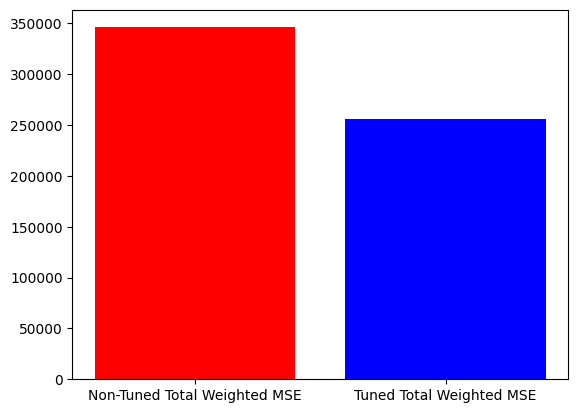

In [19]:
x_values = ['Non-Tuned Total Weighted MSE', 'Tuned Total Weighted MSE']
y_values = [total_weighted_mse_value, total_weighted_mse_tuned_value]
print(total_weighted_mse_value)
print(total_weighted_mse_tuned_value)
plt.bar(x_values, y_values, color = ['red', 'blue'])

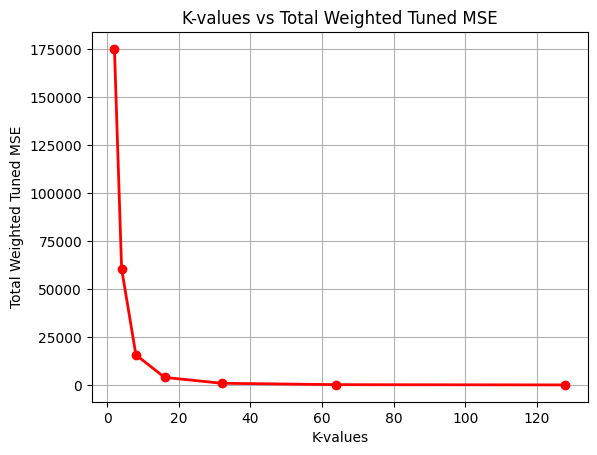

In [29]:
k_values = [2, 4, 8, 16, 32, 64, 128]
plt.plot(k_values, total_weighted_mse_tuned, 'ro-', linewidth=2)
plt.title('K-values vs Total Weighted Tuned MSE');
plt.xlabel('K-values')
plt.ylabel('Total Weighted Tuned MSE')
plt.grid(True)